## DMA 18/03
simmetrico con 11 strati + 1(rc 200, sottile !)


| spessore | ply    | tipo           | oientamento |
|----------|--------|----------------|-------------|
| 0.26     | RC-200 | Tessuto (fine) | 0/90        |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.47     | XC-400 | c-ply          | -45/+45     |
| 0.33     | UC-300 | unidirezionale | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.47     | XC-400 | C-ply          | -45/45      |
| 0.49     | RC-400 | Tessuto        | 0/90        |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# \dma\CFRP_0.5N encoding = 'cp1252' engine='python' skipfooter =1 decimal= ","

def estrai(path_base,N,name = None):
    if name == None:
        name = f'_{np.arange(1,N+1)}'
    else:
        N = len(name)
    data = pd.DataFrame(columns = ['test','f','M*','tan_delta'])
    names = ['Index','Ts','t','f','F','x','Phase','F0','x0','Tr','M','M\'','M*','tan_delta','C','C\'','C*']
    for i in range(N):
        df = pd.read_csv(path_base+f'{name[i]}.txt',delim_whitespace=True,names = names,skiprows=2,encoding = 'cp1252',engine='python',skipfooter =1)
        df['test'] = f'{name[i]}'
        df['f'] = df['f'].str.replace(',','.')
        df['f'] = pd.to_numeric(df['f'])
        df['M*'] = df['M*'].str.replace(',','.')
        df['M*'] = pd.to_numeric(df['M*'])
        
        df['tan_delta'] = df['tan_delta'].str.replace(',','.')
        df['tan_delta'] = pd.to_numeric(df['tan_delta'])
        data = pd.merge(data,df[['test','f','M*','tan_delta']],how='outer')
    data = data.set_index(['test'])
    return data

def plottaggio(data,ax1,ax2,label='',f_min=0,f_max=None,name = None,flag_colore = 0,label_colore = 'dietro'):
    if name == None:
        name = pd.Series(data.index.values).unique() # da rivedere
    if f_max == None:
        f_max = data.loc[name[0]]['f'][-1]
    data = data[(data['f'] >= f_min) & (data['f'] <= f_max)]
    N = len(name)
    M_media = np.zeros(data.loc[name[0]]['M*'].size)
    tan_media = np.zeros(data.loc[name[0]]['M*'].size)
    f = data.loc[name[0]]['f'].to_numpy()
    colore_media = '#%02x%02x%02x' % (np.random.randint(256),np.random.randint(256),np.random.randint(256))
    for i in range(N):
        if flag_colore == 0:
            colore = '#%02x%02x%02x' % (np.random.randint(256),np.random.randint(256),np.random.randint(256))
        elif flag_colore == 1:
            colore = colore_media
        elif flag_colore == 2:
            if label_colore in name[i]:
                colore = 'darkorange'
            else:
                colore = 'darkred'
            
        data.loc[name[i]].plot.scatter(x='f',y='M*',ax = ax1,label=f'test {name[i]}{label}',color = colore)
        data.loc[name[i]].plot.scatter(x='f',y='tan_delta',ax = ax2,label=f'test {name[i]}{label}',color = colore)
        M_media += data.loc[name[i]]['M*'].to_numpy()/(N)
        tan_media += data.loc[name[i]]['tan_delta'].to_numpy()/(N)

    ax1.plot(f,M_media,label='media',color = colore_media)   
    ax2.plot(f,tan_media,label='media',color = colore_media)
    ax1.set(title='M*')
    ax2.set(title='tan_delta')
    return (ax1,ax2)

f_min = 20
f_max = 100

# strato 1
- Dritto

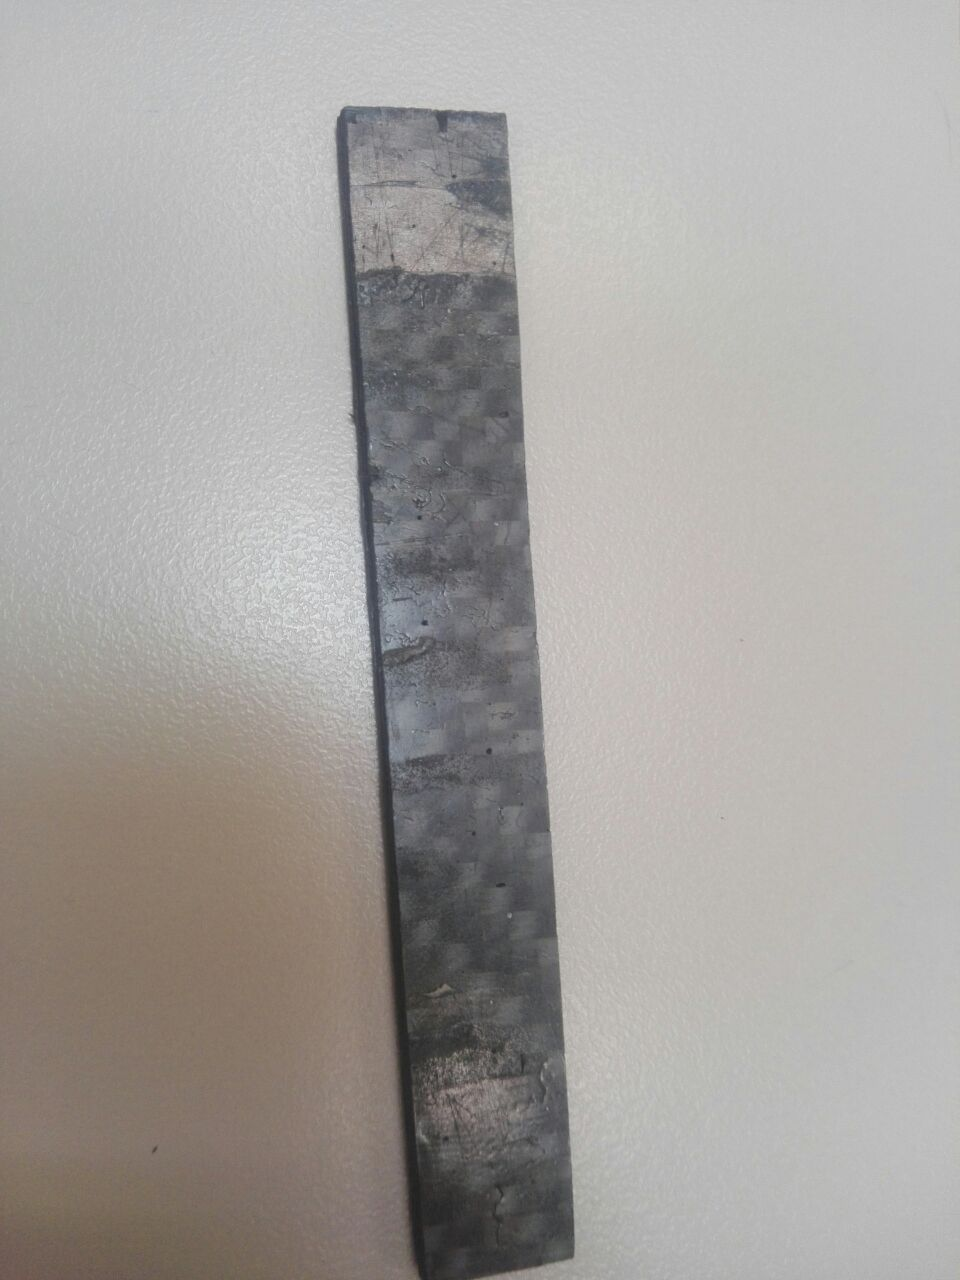


- dietro

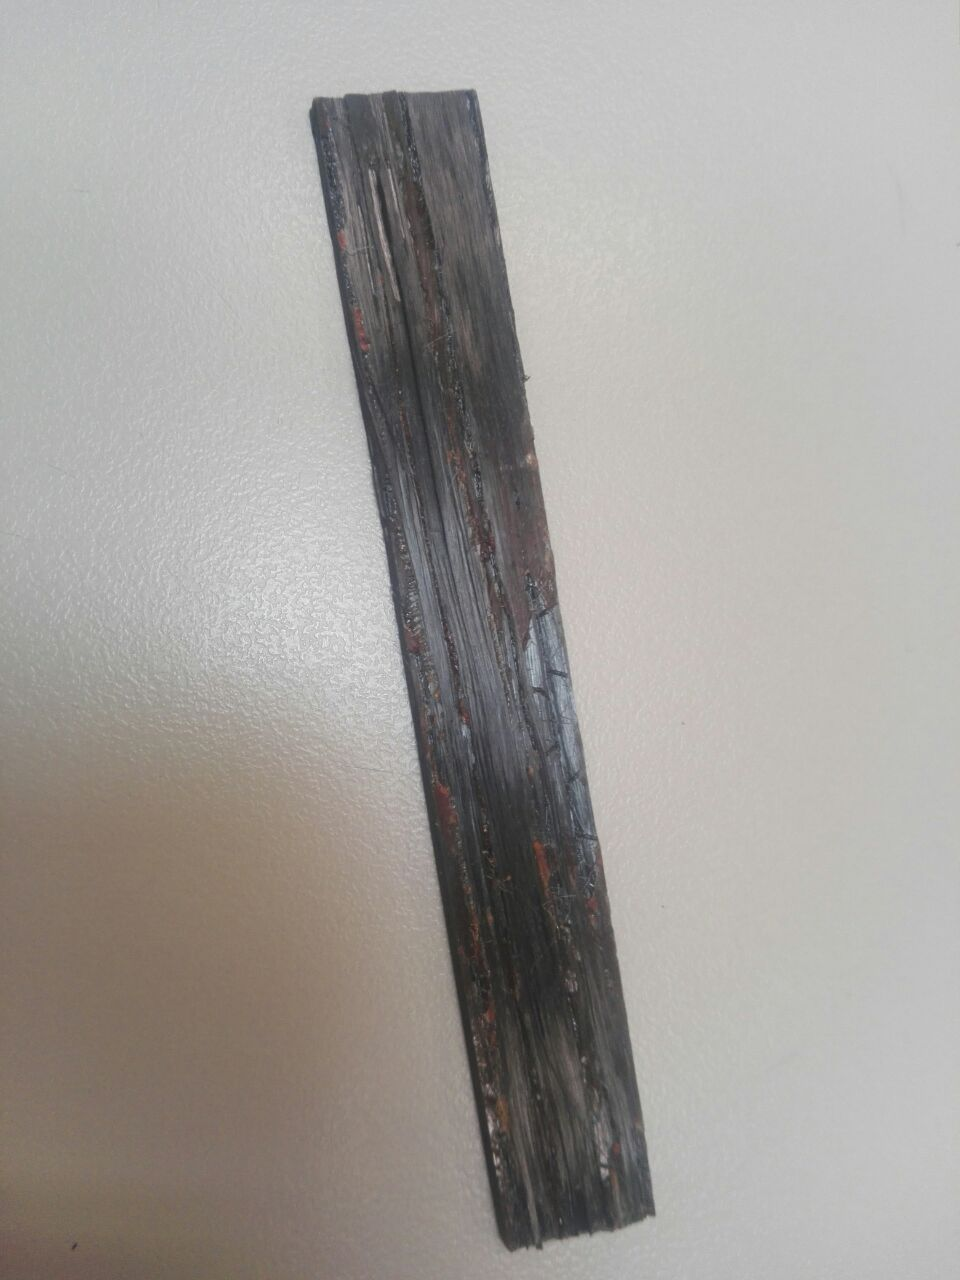

- layer ipotizzati

| Nome  | tipo                | quantità |
|-------|---------------------|----------|
| rc200 | tessuto fine (0/90) | 1        |
| rc400 | tessuto (0/90)      | 1        |
| xc400 | C-ply (-45/45)      | 1        |
| uc300 | unidirezionale      | 1/2,1,2? |

## File CFRP_f1_100_5_1N

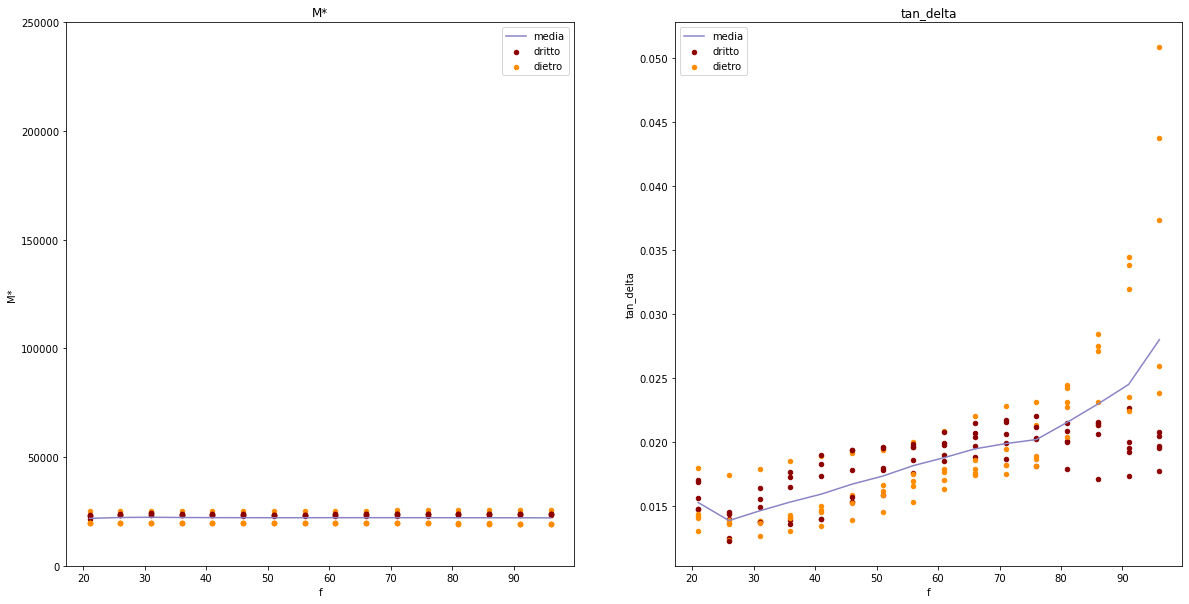

In [3]:
y_lim = 0.25e6

path_base = r'dma/marzo 18/strato 1/'
name = []
for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
data_1N_strato_1 = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N_strato_1,ax1,ax2,f_min = f_min,f_max = f_max,flag_colore = 2)
ax1.legend(['media','dritto','dietro'])
ax2.legend(['media','dritto','dietro'])
ax1.set_ylim([0,y_lim])

plt.show()

## strato 1 File a 2N == > CFRP_f1_100_5_2N

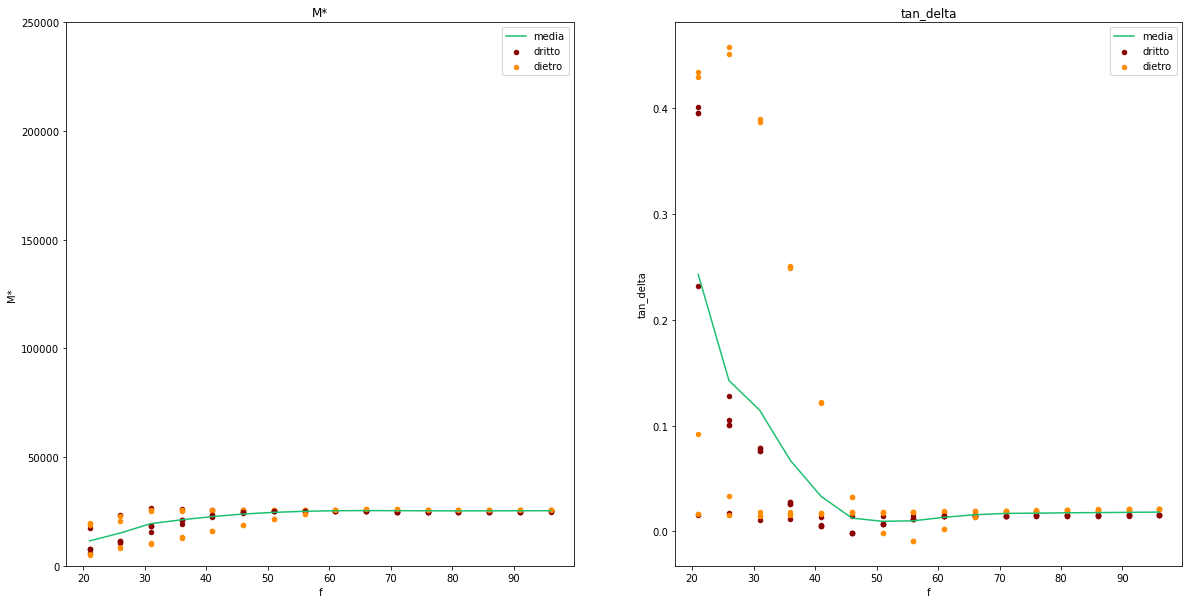

In [4]:
name = []
for i in range(5):
    name.append(f"CFRP_f1_100_5_2N_{i+1}")
    name.append(f"CFRP_f1_100_5_2N_dietro_{i+1}")

data_2N_strato_1 = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_2N_strato_1,ax1,ax2,f_min = f_min,f_max = f_max,flag_colore = 2)
ax1.legend(['media','dritto','dietro'])
ax2.legend(['media','dritto','dietro'])
ax1.set_ylim([0,y_lim])
plt.show()

# Insieme

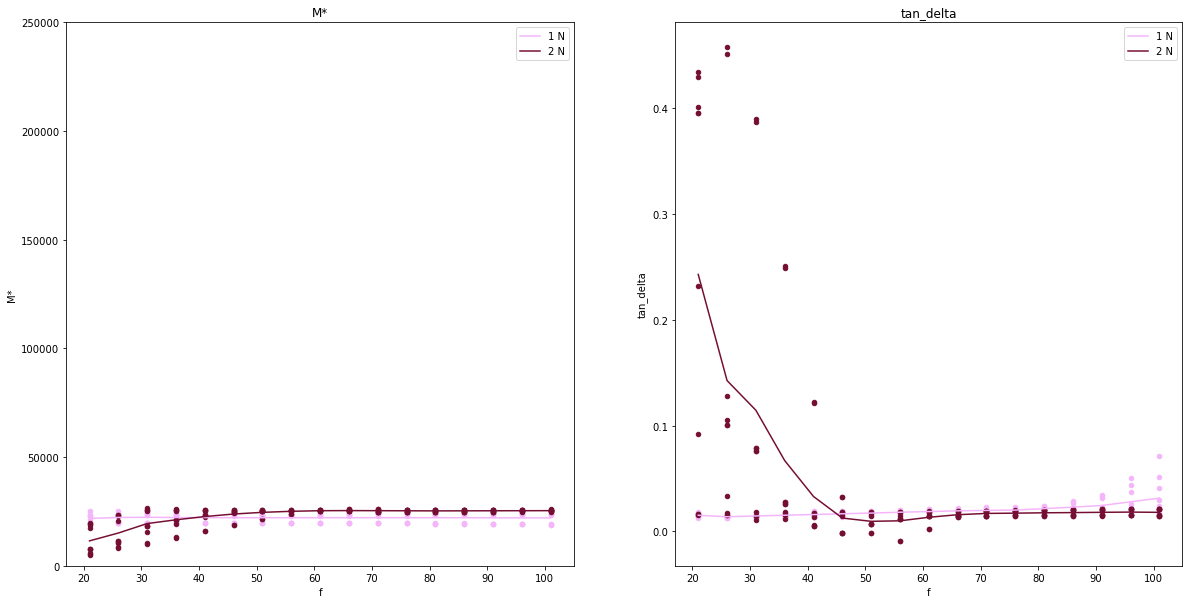

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_1N_strato_1,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_2N_strato_1,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['1 N','2 N'])#
ax2.legend(['1 N','2 N'])
ax1.set_ylim([0,y_lim])

plt.show()

# strato 1/2
- stesso avanti e dietro

    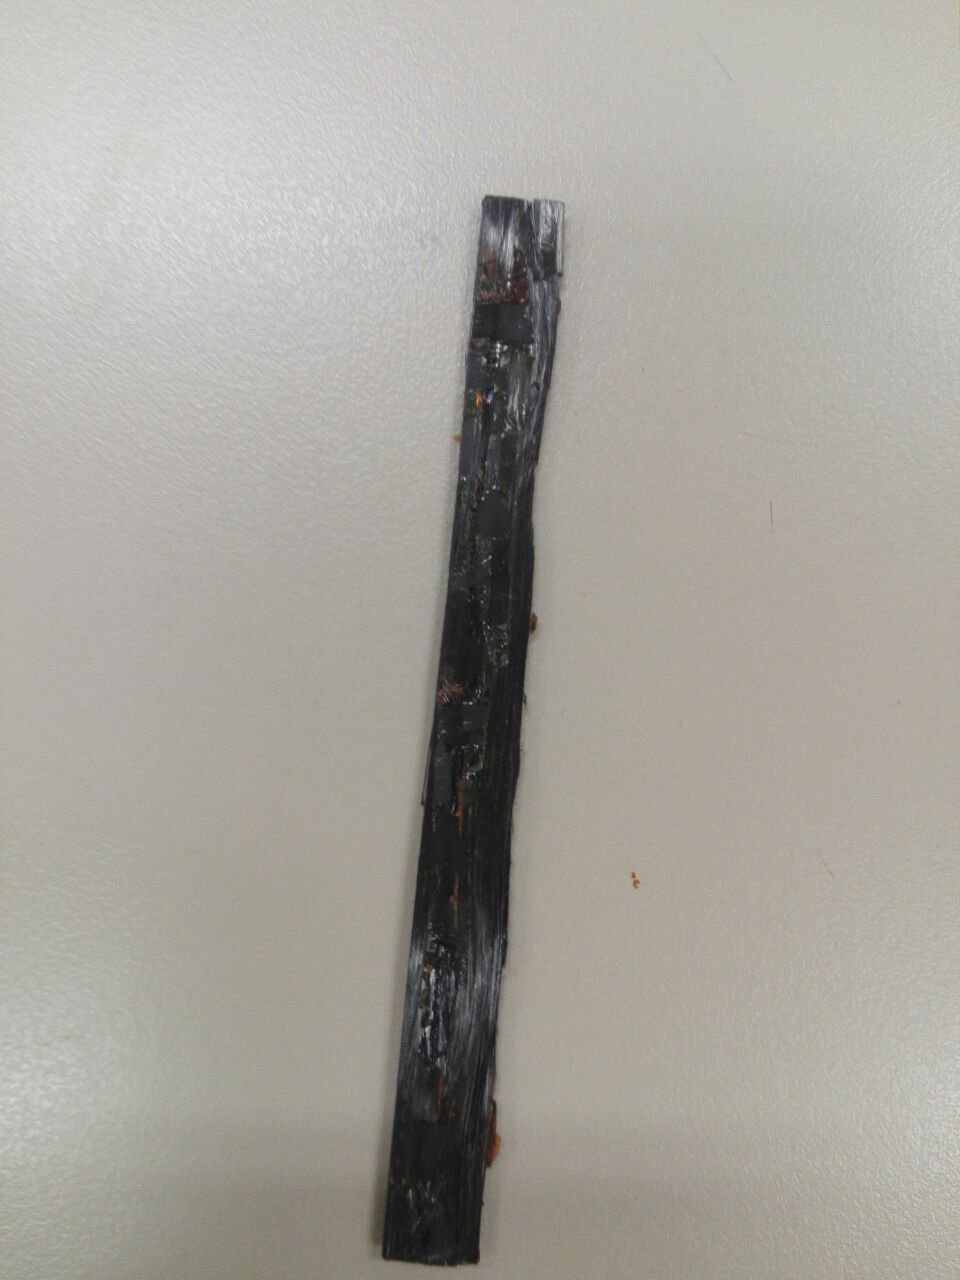
    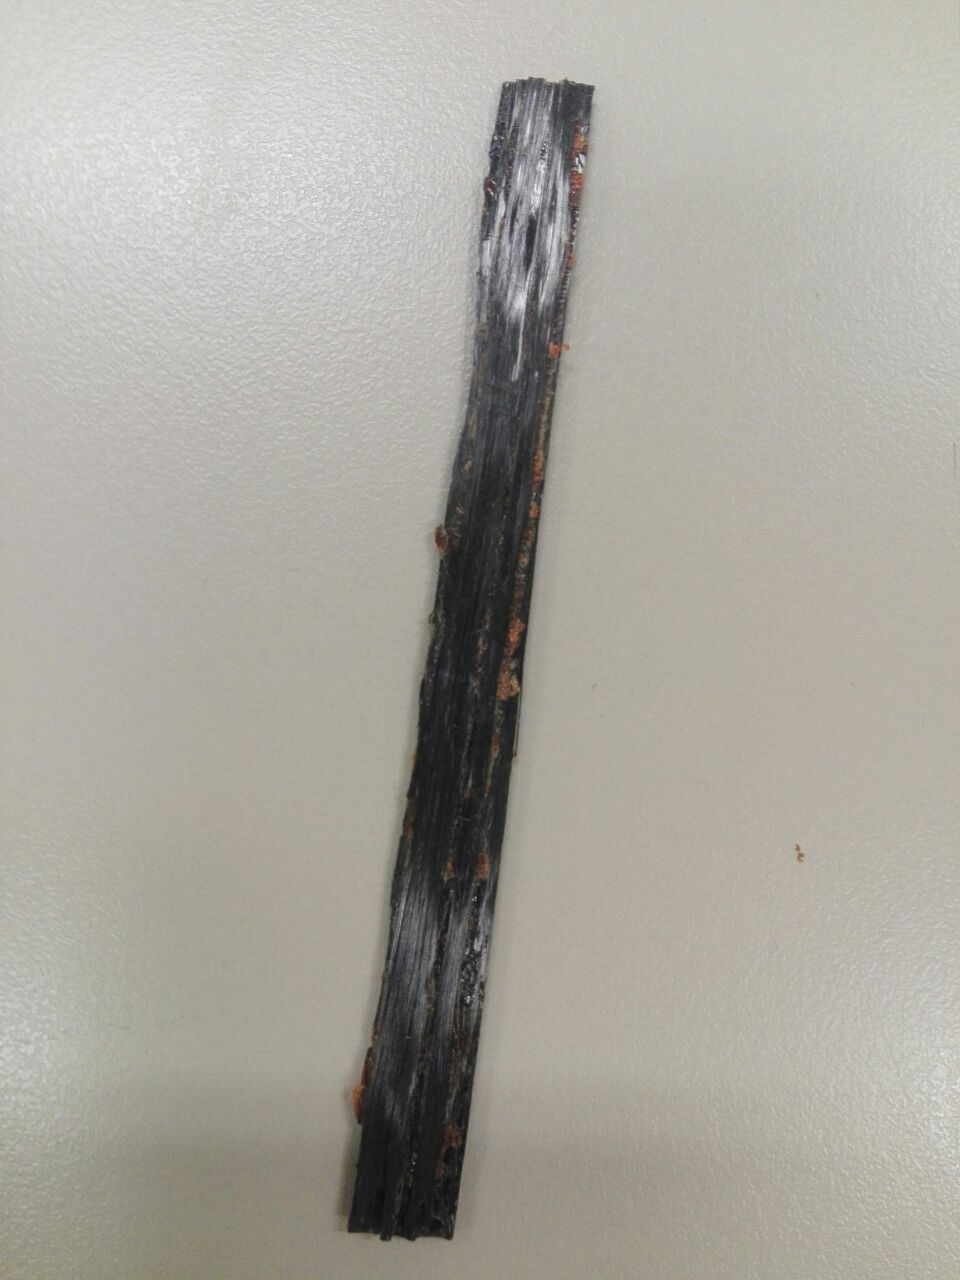
    
| Nome  | tipo                | quantità |
|-------|---------------------|----------|
| uc300 | unidirezionale      | 1,2,3? |

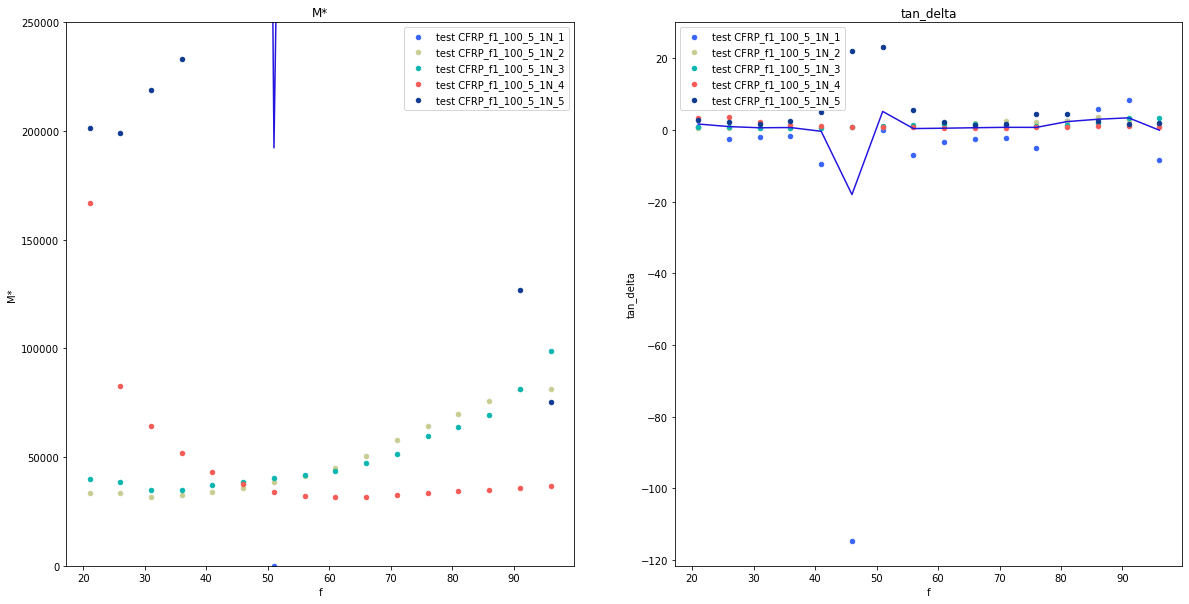

escludo il risultato ==> 1 e 5


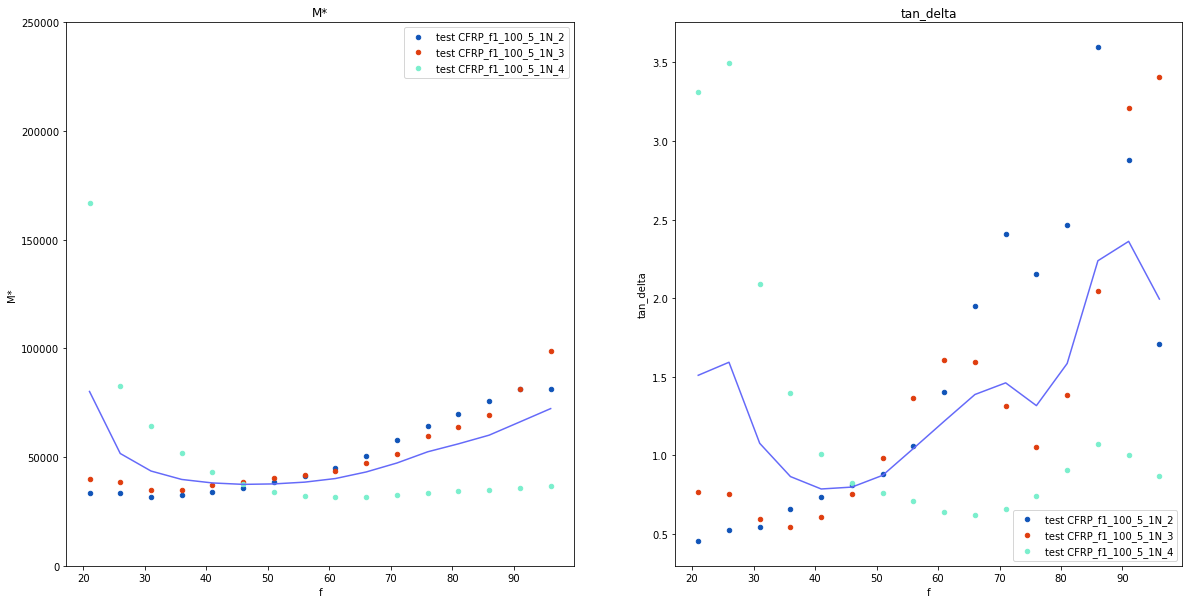

In [6]:
path_base = r'dma/marzo 18/strato 1-2/'
name = []
for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
data_1N_strato_1_2 = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N_strato_1_2,ax1,ax2,f_min = f_min,f_max = f_max)
ax1.set_ylim([0,y_lim])
plt.show()
print('escludo il risultato ==> 1 e 5')
name.remove('CFRP_f1_100_5_1N_1')
name.remove('CFRP_f1_100_5_1N_5')
data_1N_strato_1_2 = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N_strato_1_2,ax1,ax2,f_min = f_min,f_max = f_max,name = name)
ax1.set_ylim([0,y_lim])
plt.show()

# strato 4

- Dritto

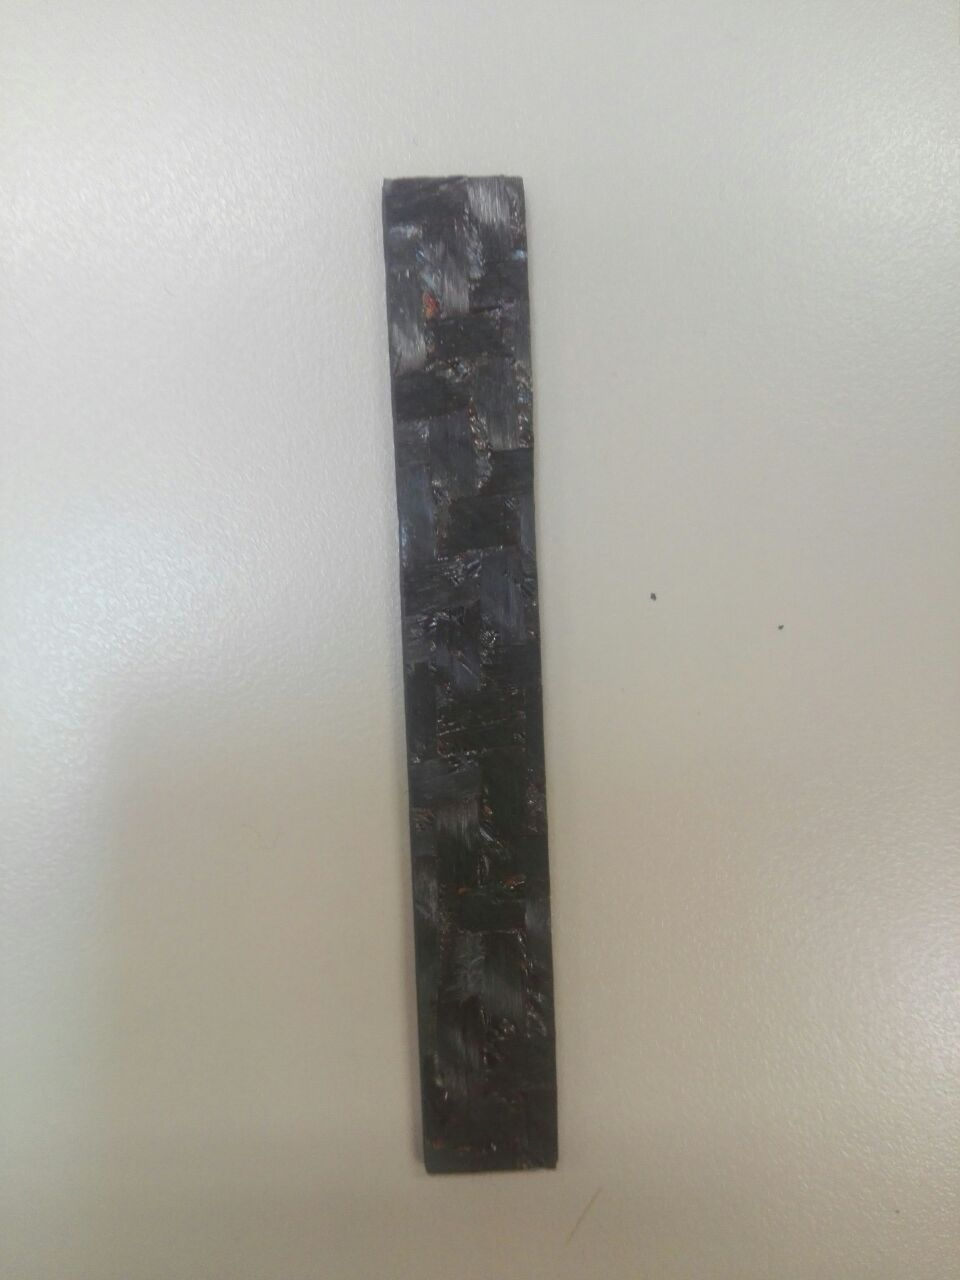

- Dietro

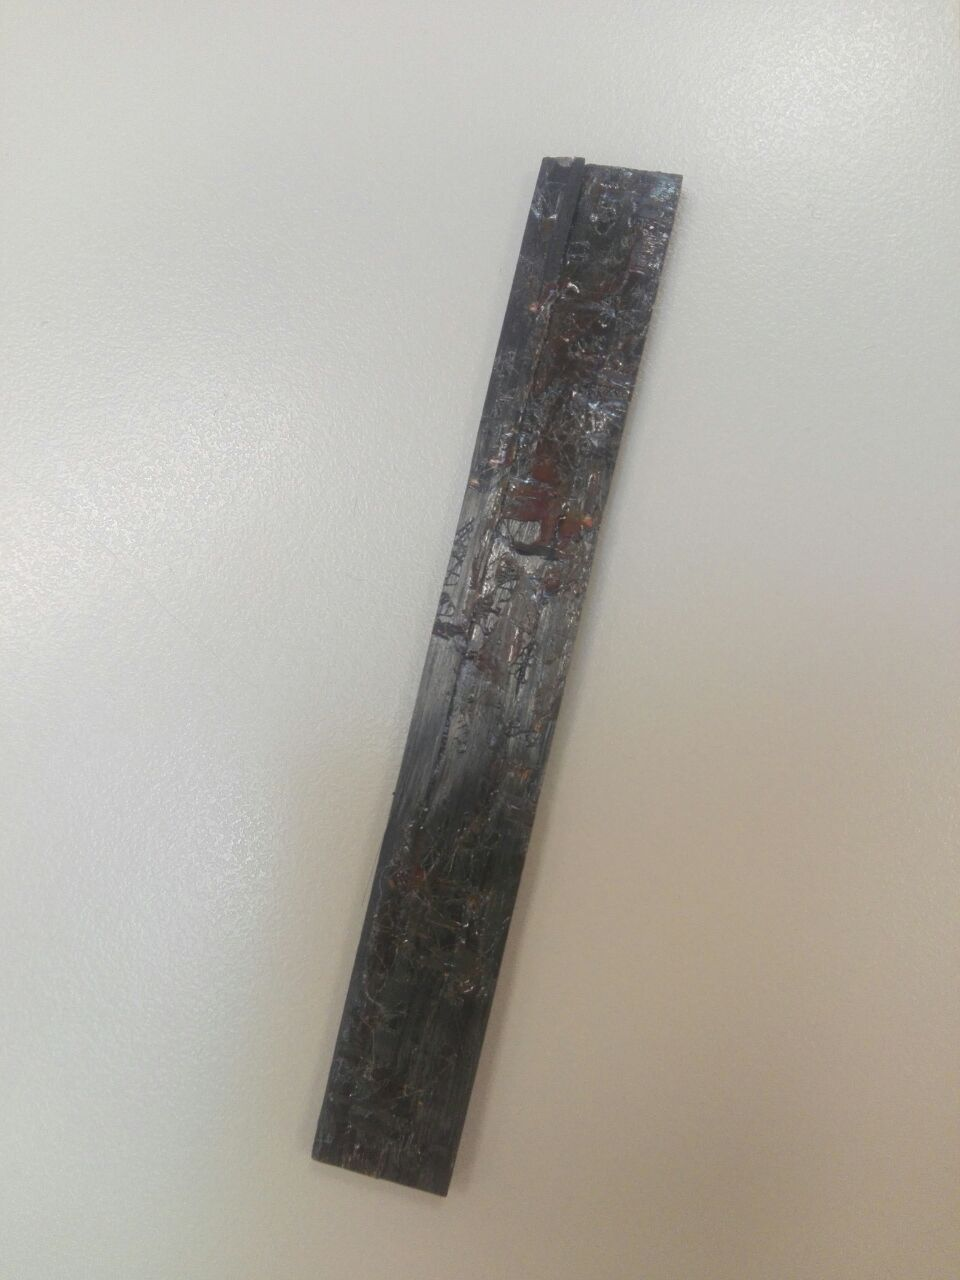

| Nome  | tipo                | quantità |
|-------|---------------------|----------|
| uc300 | unidirezionale      | 3?       |
| rc400 | tessuto (0/90)      | 1        |


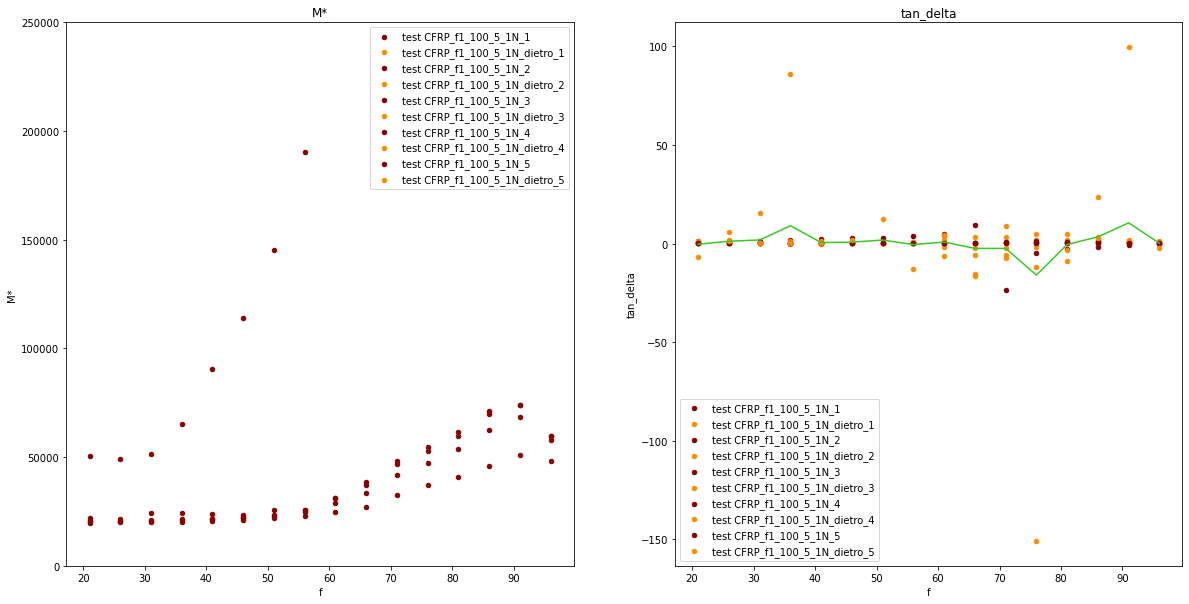

In [7]:
path_base = r'dma/marzo 18/strato 4/'
name = []
for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
data_1N_strato_4 = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N_strato_4,ax1,ax2,f_min = f_min,f_max = f_max,flag_colore = 2)
ax1.set_ylim([0,y_lim])
plt.show()

## strato 4 ==> separando avanti e dietro

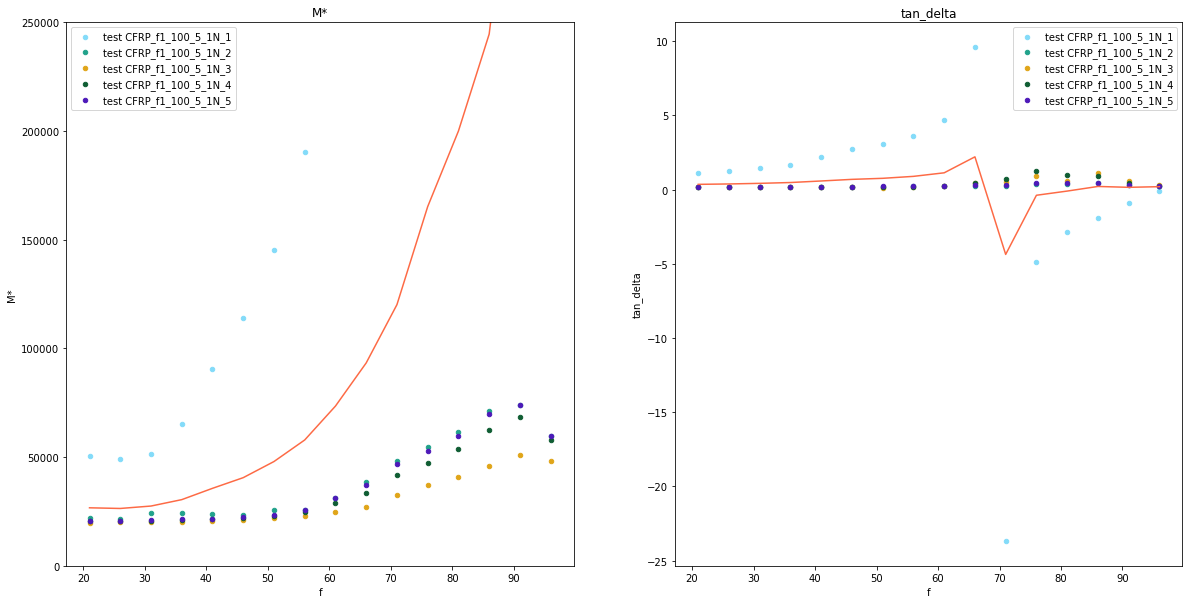

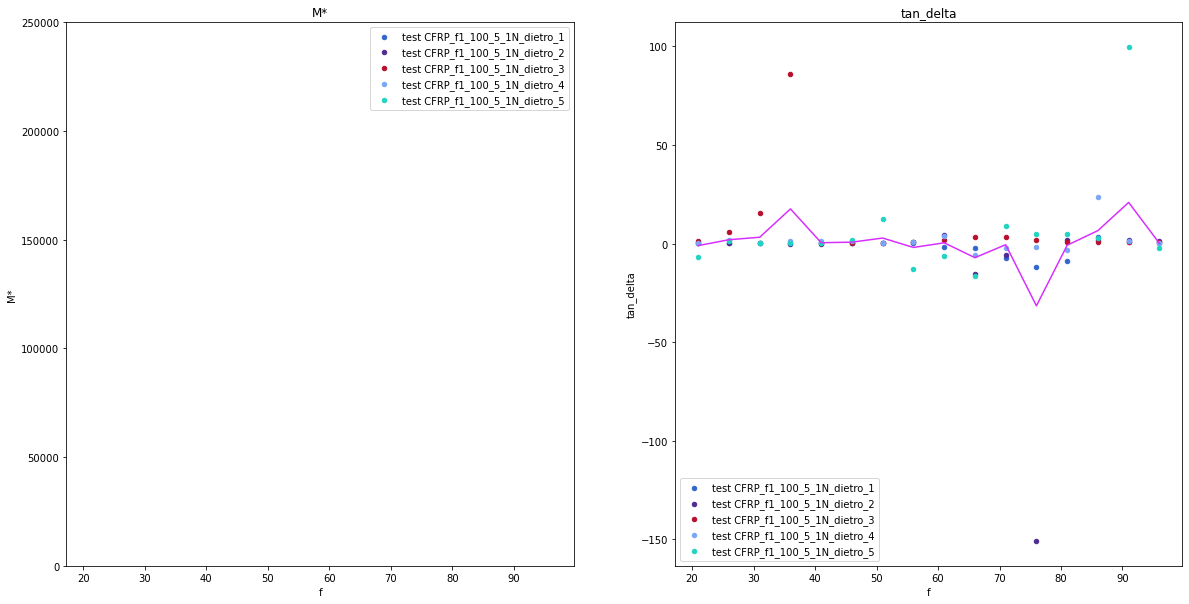

escludo il risultato ==> 3 e 1
dritto


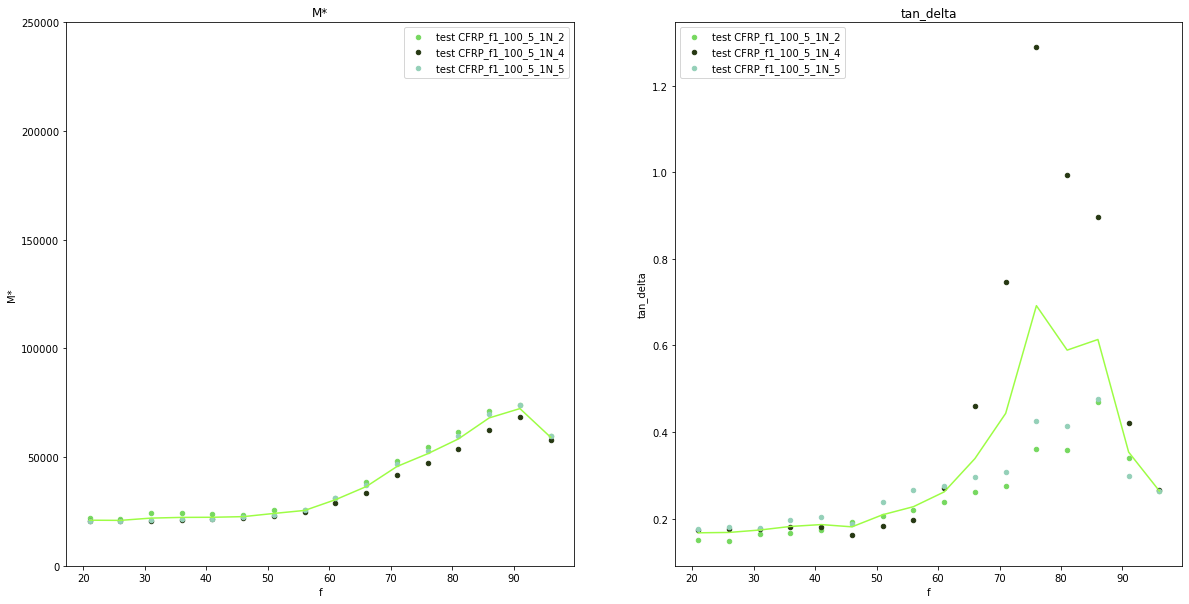

In [8]:
data_1N = []
for j in (0,1):
    name[j] = []
    for i in range(1,6):
        if j == 0:
            name[j].append(f"CFRP_f1_100_5_1N_{i}")
        else:
            name[j].append(f"CFRP_f1_100_5_1N_dietro_{i}")
    data_1N.append(estrai(path_base,1,name=name[j]))
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    plottaggio(data_1N[j],ax1,ax2,f_min = f_min,f_max = f_max)
    ax1.set_ylim([0,y_lim])
    plt.show()

print('escludo il risultato ==> 3 e 1')
print('dritto')

name[0].remove('CFRP_f1_100_5_1N_3')
name[0].remove('CFRP_f1_100_5_1N_1')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N[0],ax1,ax2,f_min = f_min,f_max = f_max,name = name[0])
ax1.set_ylim([0,y_lim])
plt.show()

## strato 4 File a 2N == > CFRP_f1_100_5_2N

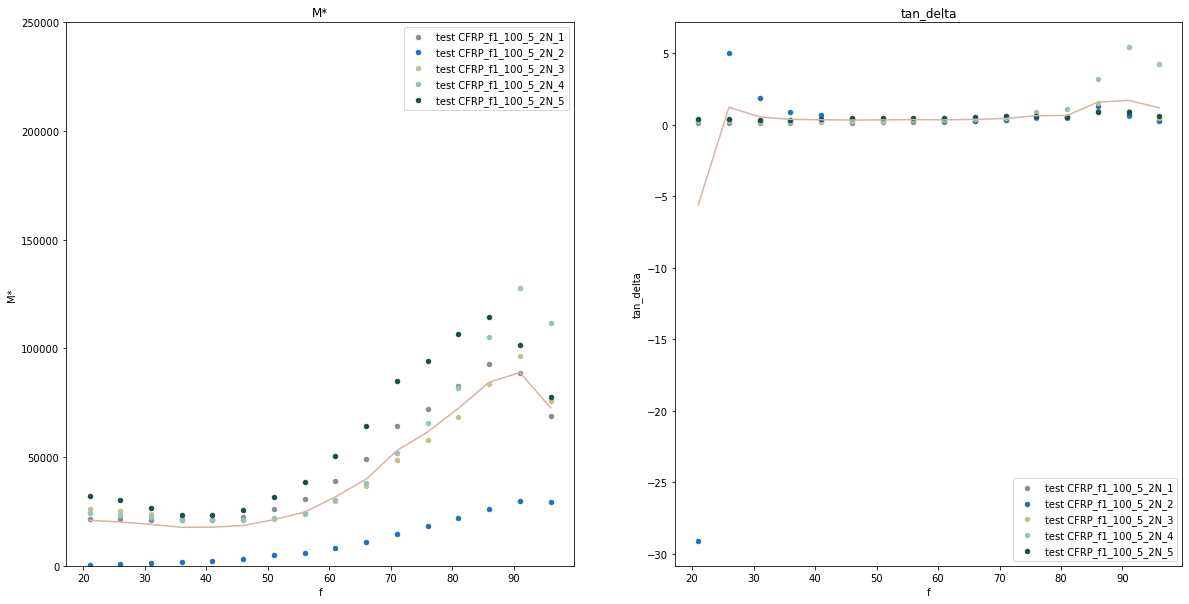

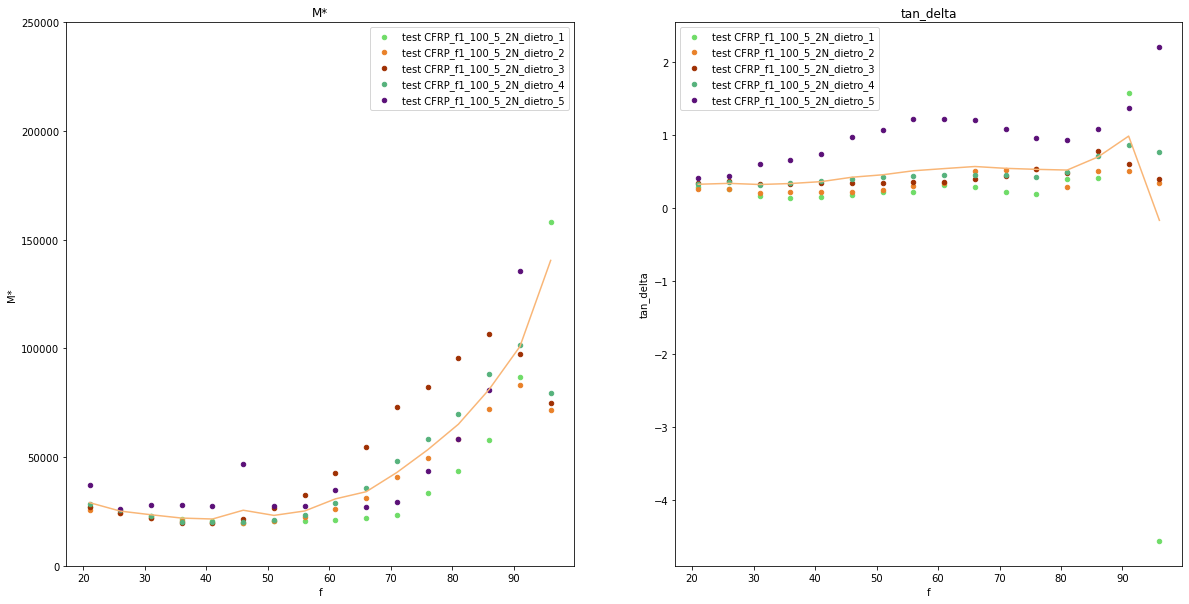

In [9]:
for j in (0,1):
    name = []
    for i in range(1,6):
        if j == 0:
            name.append(f"CFRP_f1_100_5_2N_{i}")
        else:
            name.append(f"CFRP_f1_100_5_2N_dietro_{i}")
    data_2N_strato_4 = estrai(path_base,1,name=name)
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    plottaggio(data_2N_strato_4,ax1,ax2,f_min = f_min,f_max = f_max)
    ax1.set_ylim([0,y_lim])
    plt.show()

# starto 5

- Davanti

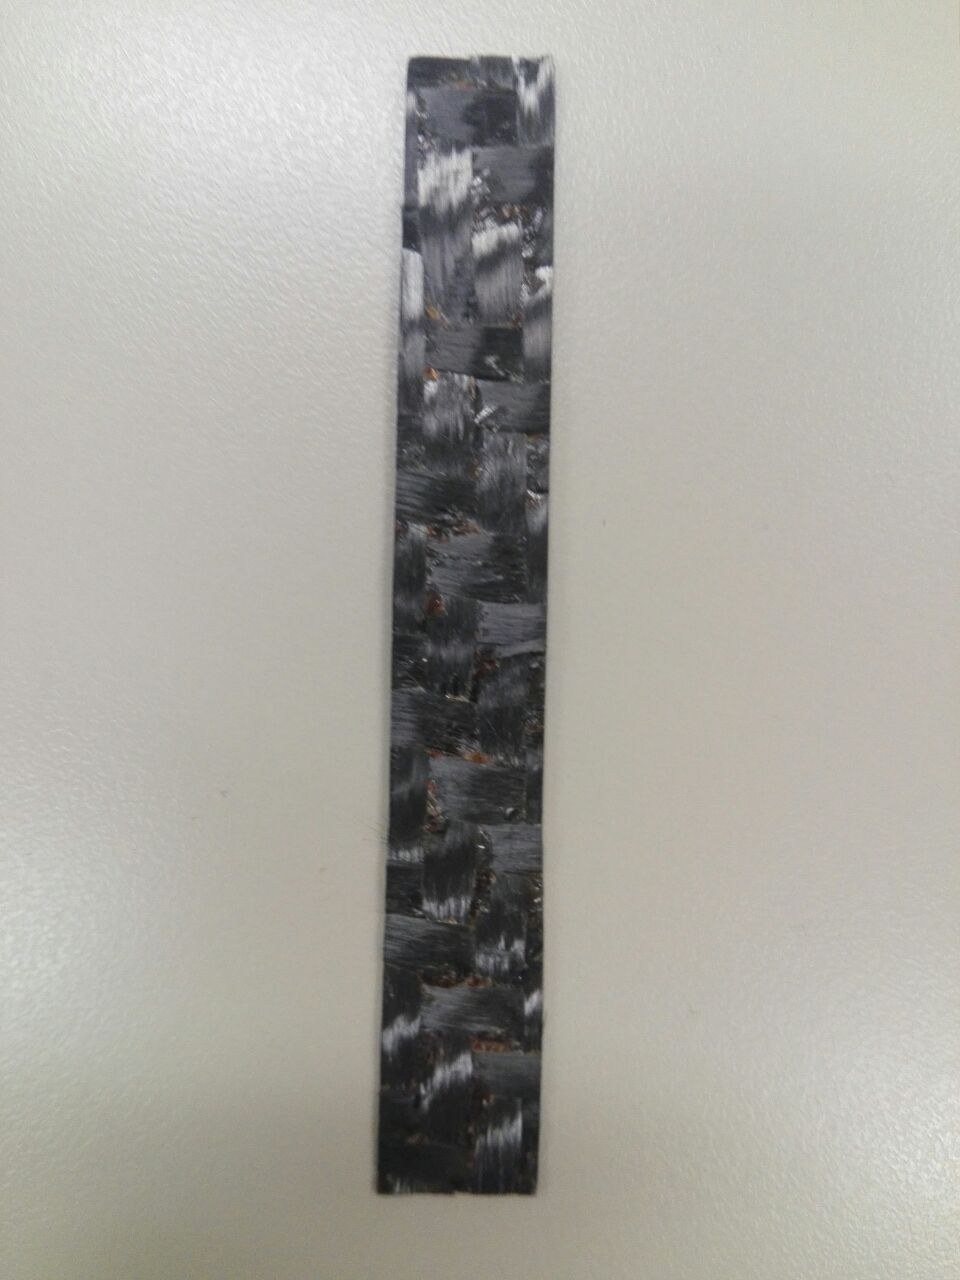

- Dietro

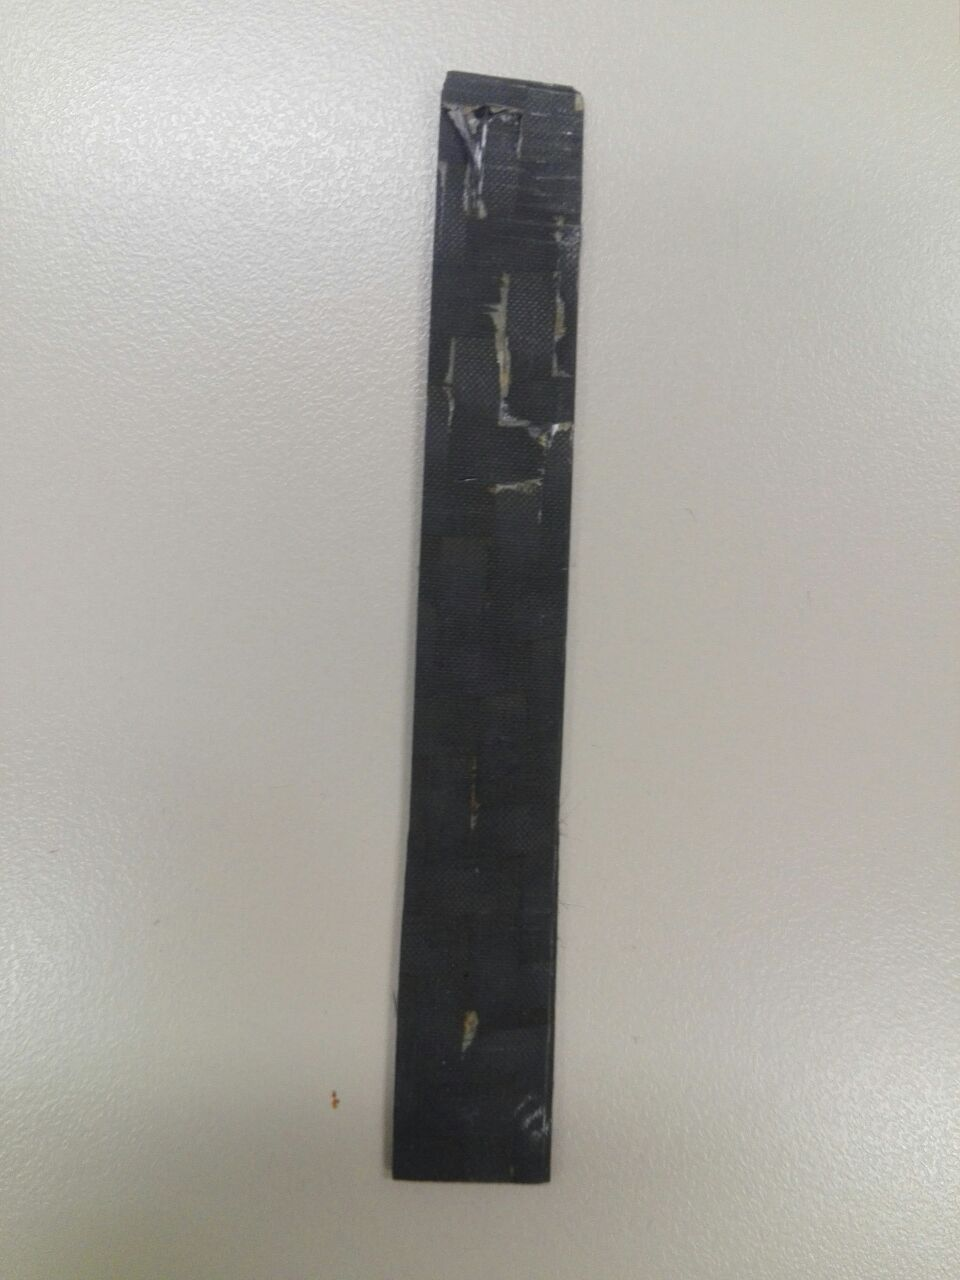


| Nome  | tipo                | quantità |
|-------|---------------------|----------|
| rc400 | tessuto (0/90)      | 1        |


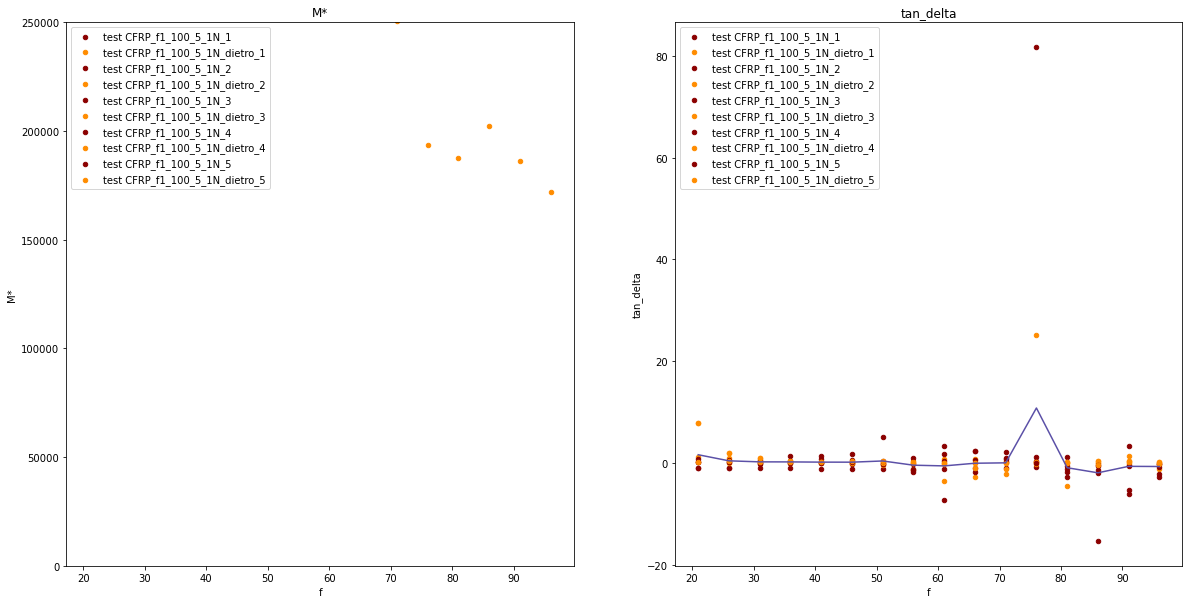

In [10]:
path_base = r'dma/marzo 18/strato 5/'
name = []
for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
data_1N = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N,ax1,ax2,f_min = f_min,f_max = f_max,flag_colore = 2)
ax1.set_ylim([0,y_lim])

plt.show()

## strato 5 separo avanti e dietro

escludo il risultato ==> 1 e 2


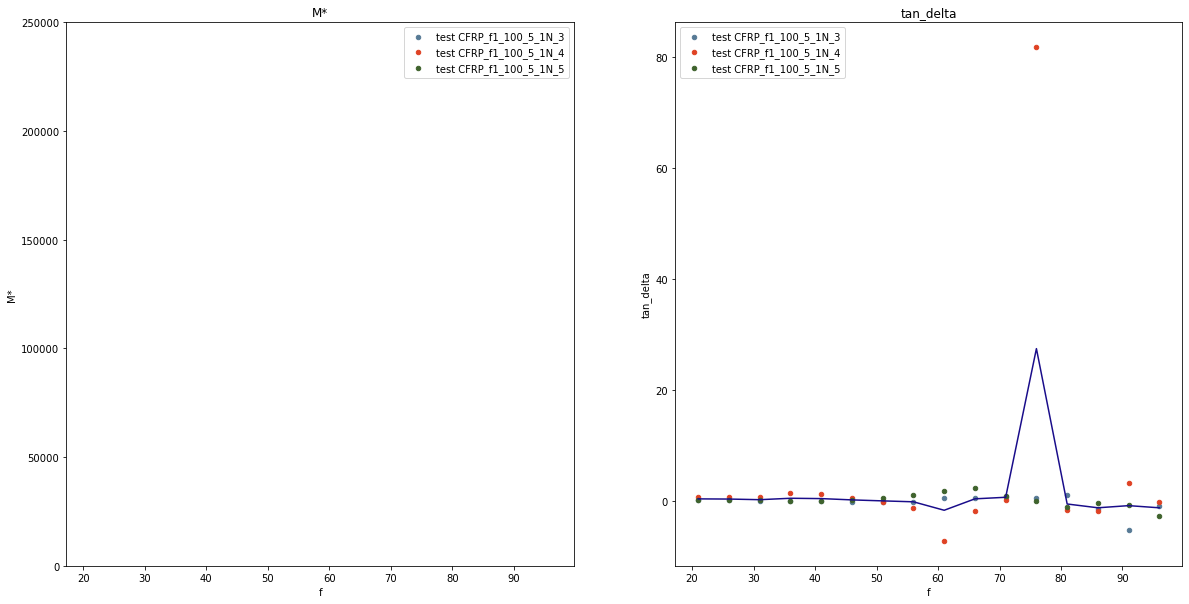

In [11]:
print('escludo il risultato ==> 1 e 2')
for i in name:
    if 'dietro' in i:
        name.remove(i)
name.remove('CFRP_f1_100_5_1N_1')
name.remove('CFRP_f1_100_5_1N_2')

data_1N_strato_5 = estrai(path_base,1,name=name)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_1N_strato_5,ax1,ax2,f_min = f_min,f_max = f_max,flag_colore = 0)
ax1.set_ylim([0,y_lim])

plt.show()

# Riassuntivo

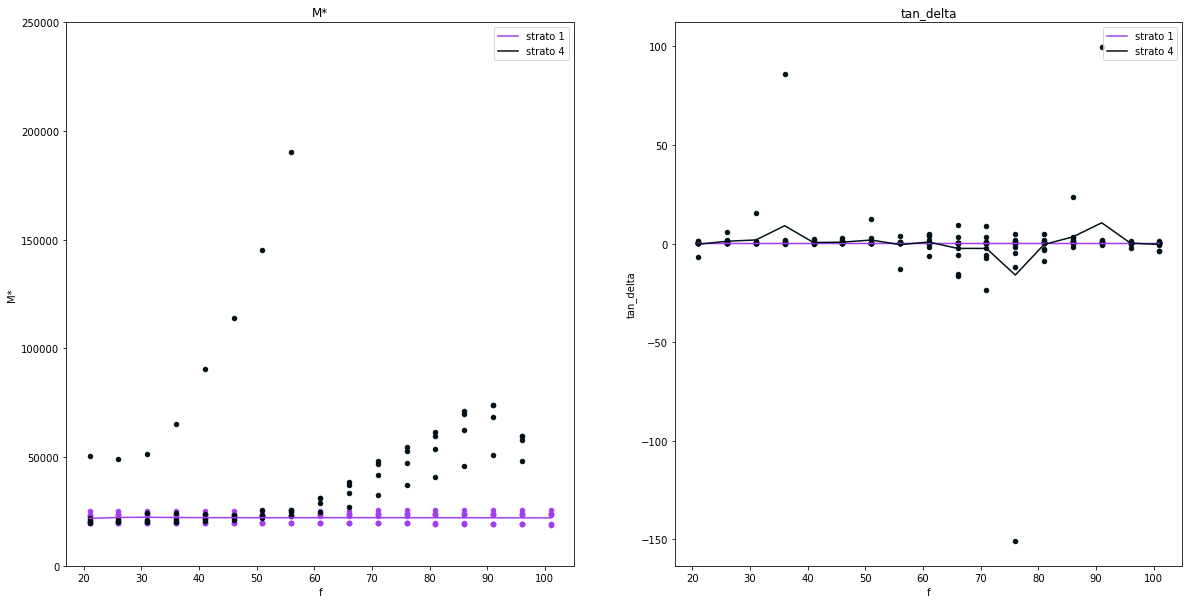

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_1N_strato_1,ax1,ax2,f_min = f_min,flag_colore = 1)
#plottaggio(data_1N_strato_1_2,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_1N_strato_4,ax1,ax2,f_min = f_min,flag_colore = 1)
#plottaggio(data_1N_strato_5,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['strato 1','strato 4'])#,'strato 5','strato 1/2'])
ax2.legend(['strato 1','strato 4'])#,'strato 5'])
ax1.set_ylim([0,y_lim])

plt.show()

# Prove 19 marzo

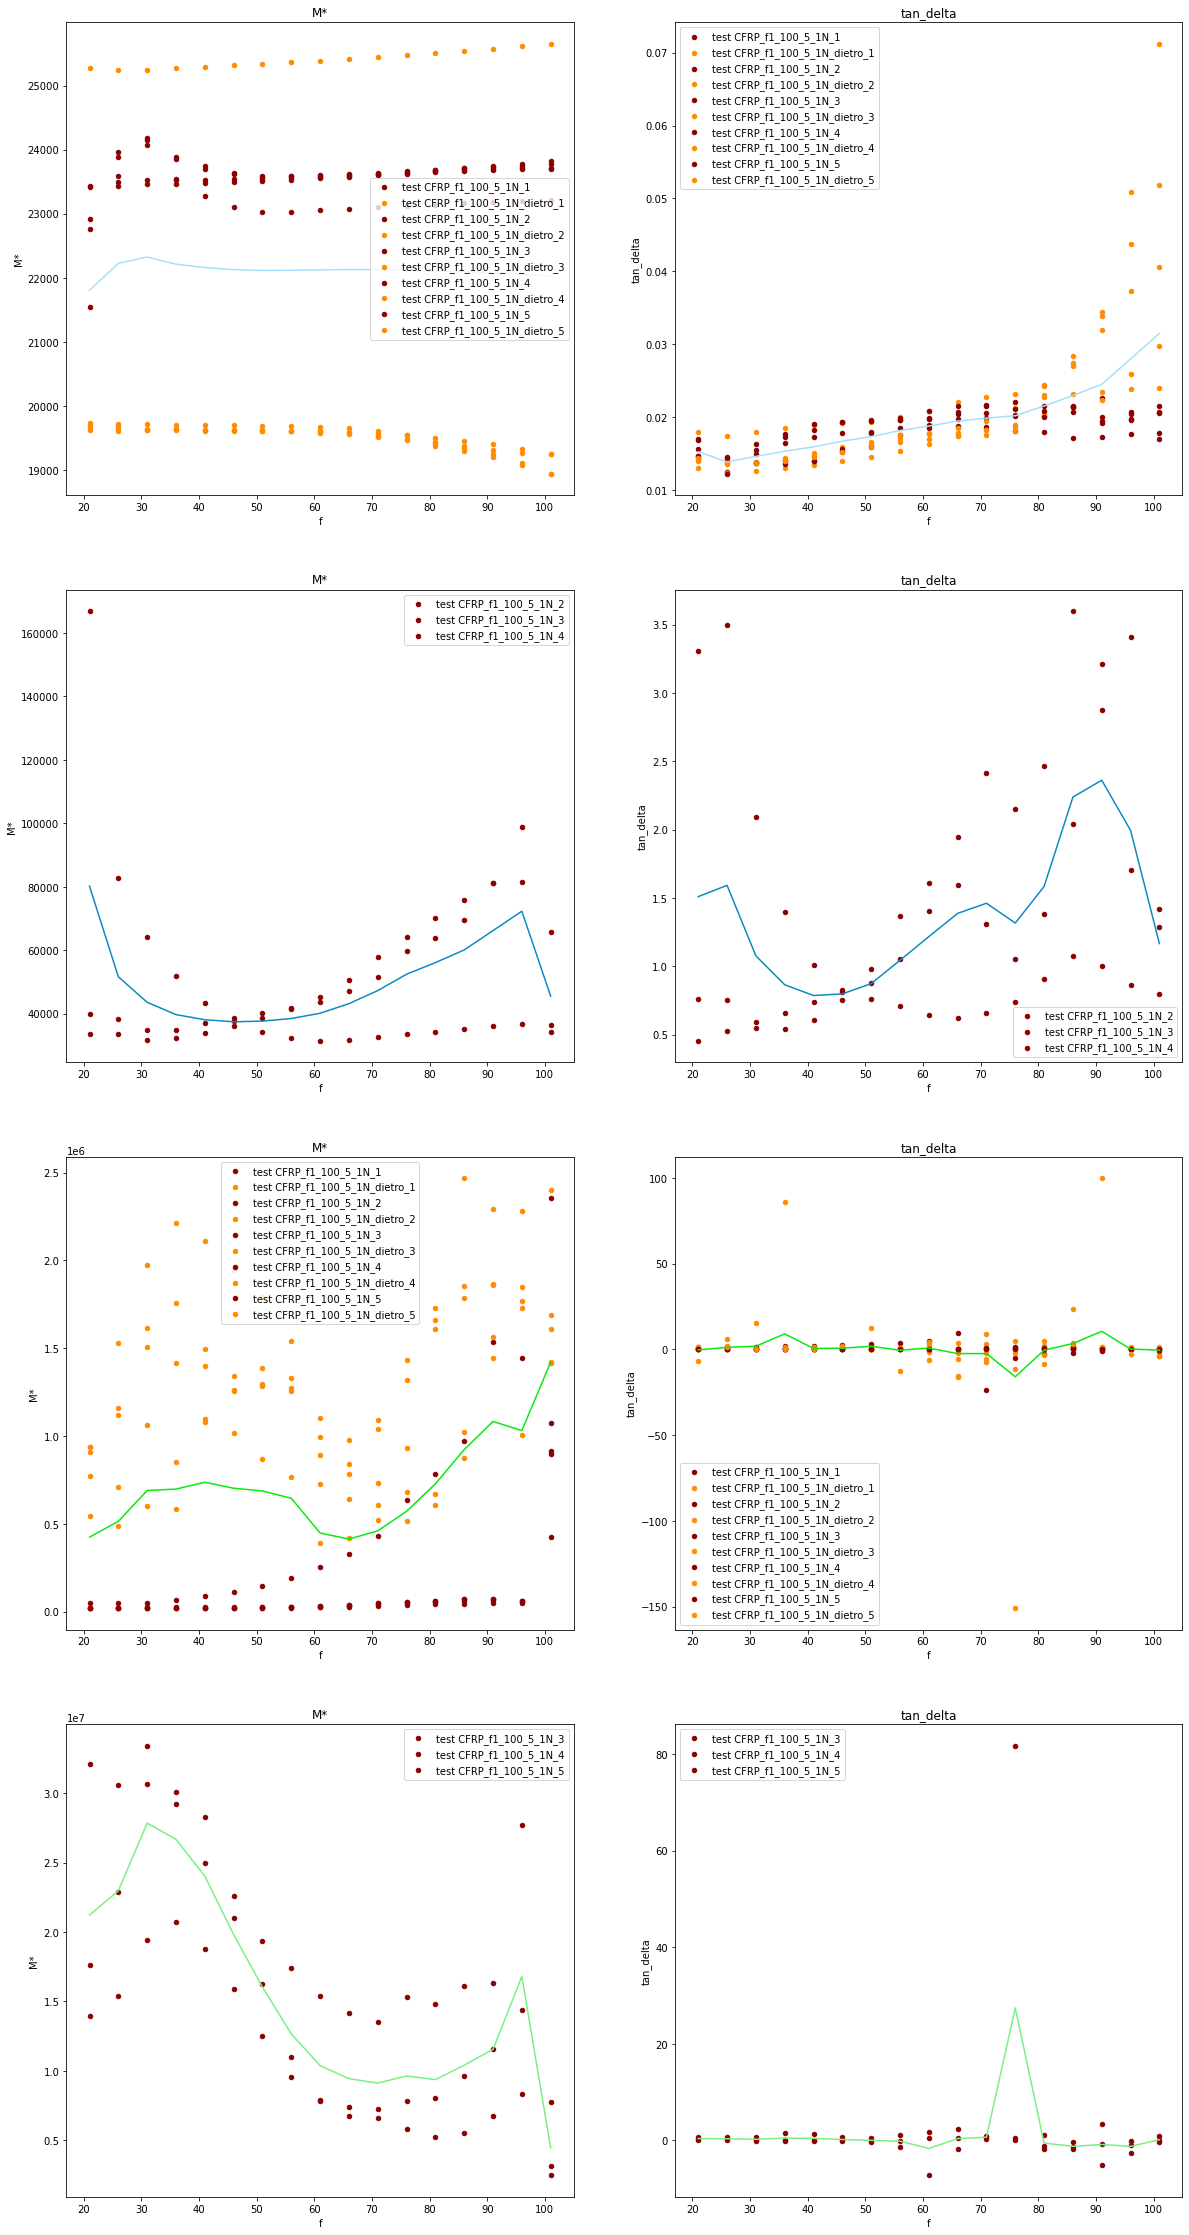

In [21]:
fig,ax = plt.subplots(4,2,figsize=(20,4*10))
plottaggio(data_1N_strato_1,ax[0][0],ax[0][1],f_min = f_min,flag_colore = 2)
plottaggio(data_1N_strato_1_2,ax[1][0],ax[1][1],f_min = f_min,flag_colore = 2)
plottaggio(data_1N_strato_4,ax[2][0],ax[2][1],f_min = f_min,flag_colore = 2)
plottaggio(data_1N_strato_5,ax[3][0],ax[3][1],f_min = f_min,flag_colore = 2)
plt.show()